# Titanic : Underutilization of its Lifeboats

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Titanic was famous, at least in the movies, for underutilizing the already too few lifeboats. So my question is, does the data support that claim?

However I noticed many flaws in the data. The csv file provided by Udacity was not a full list of passengers on the Titanic. I thought it may be only a sample, but it seems strange to use a sample of 892 for a population of 1,309. So I found a more complete list of passengers, called titanic3, from UV's (Vanderbilt University) Department of Biostatistics http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets. While it is not a complete list (there were 1,317 passengers and 1,126 crew members according to encyclopedia-titanica.org), it is the most complete I could find without making my own list. It contains the same data as Udacity's list, but with more passengers and additional data. A more thorough explanation of how they compiled this data and other pertinent information can be found here http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html and here http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import IPython
import pylab as pl
plt.style.use('seaborn-whitegrid')
titanic_list = pd.read_csv('titanic3.csv')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

First I want to look over the data to see what needs cleaning up.

In [2]:
titanic_list.head(100)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Looking over the data, there are many columns which I do not need. I also notice some passangers have multiple boats in the boat column which I will have to clean up. I also would like to have the boat data reflect not just the boat number, but the type of boat. I would also like to remove NaN in the boat column with 'Unknown'.

### Data Cleaning (Replace this with more specific notes!)

There were some survivors who did not have any data in the 'boat' column. Because some may have gotten in a lifeboat but for some reason the data was lost, I felt I should include them in graph. 

In [3]:
#Replaces boat values that have multiple boats with NaN.
loc = 0
for boat in titanic_list['boat']:
    if not (boat == '1' or boat == '2' or boat == '3' or boat == '4' or boat == '5' or 
            boat == '6' or boat == '7' or boat == '8' or boat == '9' or boat == '10' or 
            boat == '11' or boat == '12' or boat == '13' or boat == '14' or boat == '15' or 
            boat == '16' or boat == 'A' or boat == 'B' or boat == 'C' or boat == 'D') and titanic_list['survived'][loc] == 1:
        titanic_list.set_value(loc, 'boat', 'Survived but Method Unknown or not by Lifeboat')
    loc = loc + 1

In [4]:
# Delete data columns that I will not use
del titanic_list['name']
del titanic_list['age']
del titanic_list['sibsp']
del titanic_list['parch']
del titanic_list['ticket']
del titanic_list['fare']
del titanic_list['cabin']
del titanic_list['embarked']
del titanic_list['home.dest']
del titanic_list['sex']
del titanic_list['body']

In [5]:
# Replace the data's boat number's with the full name, number and location of the lifeboat.
titanic_list['boat'] = titanic_list['boat'].replace('1', 'Cutter Boat 1 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('2', 'Cutter Boat 2 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('3', 'Clinker Boat 3 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('4', 'Clinker Boat 4 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('5', 'Clinker Boat 5 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('6', 'Clinker Boat 6 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('7', 'Clinker Boat 7 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('8', 'Clinker Boat 8 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('9', 'Clinker Boat 9 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('10','Clinker Boat 10 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('11','Clinker Boat 11 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('12','Clinker Boat 12 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('13','Clinker Boat 13 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('14','Clinker Boat 14 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('15','Clinker Boat 15 (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('16','Clinker Boat 16 (port)')
titanic_list['boat'] = titanic_list['boat'].replace('A', 'Collapsible Boat A (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('B', 'Collapsible Boat B (port)')
titanic_list['boat'] = titanic_list['boat'].replace('C', 'Collapsible Boat C (starboard)')
titanic_list['boat'] = titanic_list['boat'].replace('D', 'Collapsible Boat D (port)')


In [6]:
# Create a group database
titanic_list_fm_group_s = titanic_list.groupby(['survived'], as_index = True)

<a id='eda'></a>
## Exploratory Data Analysis

First I take a quick and dirty look at two histograms. The plots are for those that did not survive (first plot) and those that did survive (second plot). Each shows the number of first class passangers (left most), the number of second class passangers (center) and the number of third class passangers (right most).

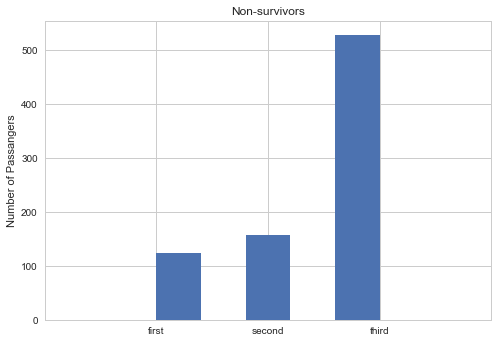

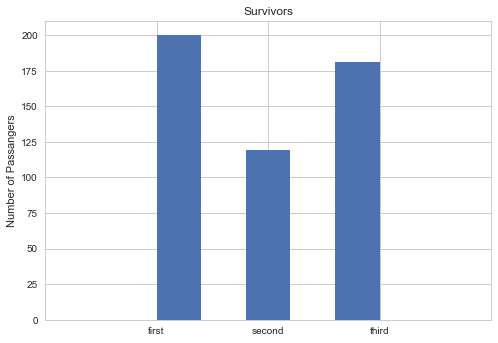

In [7]:
ax = titanic_list_fm_group_s.hist(bins=5)
ax[0][0][0].set_title('Non-survivors')
ax[1][0][0].set_title('Survivors')
ax[0][0][0].set_ylabel('Number of Passangers')
ax[1][0][0].set_ylabel('Number of Passangers')
ax[0][0][0].set_xticks(range(5))
ax[0][0][0].set_xticklabels(['', 'first', 'second', 'third', ''])
ax[1][0][0].set_xticks(range(5))
ax[1][0][0].set_xticklabels(['', 'first', 'second', 'third', '']);

Besides the large difference between the number of passanger who died (top plot) versus the number of passangers who survived, you can also see who died versus survived is very skewed. Despite there being fewer first class passangers than second or third class passangers, first class survivors out number second and third class respectively. 

### Were the Titanic's Lifeboats Underutilized?

In [8]:
# Create a group database
titanic_list_fm_group_b = titanic_list.groupby(['boat'], as_index = False)
titanic_list_fm_group_p = titanic_list.groupby(['pclass'], as_index = True)
titanic_list_fm_group_bp = titanic_list.groupby(['boat', 'pclass'], as_index = True)

In [9]:
# Create a list of the total number of passangers on each lifeboat.
titanic_list_fm_group_b_pcount = titanic_list_fm_group_b['pclass'].agg(['count'])
titanic_list_fm_group_b_keys = titanic_list_fm_group_b.groups.keys()
titanic_list_boat_count = {}
for key in titanic_list_fm_group_b_keys:
    titanic_list_boat_count[key] = titanic_list_fm_group_b_pcount['count'][key]

The max capasity for each type of boat was taken from pages 110 and 112 of:
Hutchings, David F.; de Kerbrech, Richard P. (2011). RMS Titanic 1909–12 (Olympic Class): Owners' Workshop Manual. Sparkford, Yeovil: Haynes. 

In [10]:
# Create a list of how much space was left on each lifeboat.
titanic_list_boat_remaining_capacity = {}
for boat in titanic_list_boat_count:
    if 'Clinker' in boat:
        titanic_list_boat_remaining_capacity[boat] = 65 - titanic_list_boat_count[boat]
    elif 'Cutter' in boat:
        titanic_list_boat_remaining_capacity[boat] = 40 - titanic_list_boat_count[boat]
    elif 'Collapsible' in boat:
        titanic_list_boat_remaining_capacity[boat] = 45 - titanic_list_boat_count[boat]

In [11]:
# Create a list of how much space was left on each lifeboat.
titanic_list_boat_remaining_capacity = {}
for boat in titanic_list_boat_count:
    if 'Clinker' in boat:
        titanic_list_boat_remaining_capacity[boat] = 65 - titanic_list_boat_count[boat]
    elif 'Cutter' in boat:
        titanic_list_boat_remaining_capacity[boat] = 40 - titanic_list_boat_count[boat]
    elif 'Collapsible' in boat:
        titanic_list_boat_remaining_capacity[boat] = 45 - titanic_list_boat_count[boat]

In [12]:
# For each extra space on each lifeboat, I created a new row of data.
for boat in titanic_list_boat_remaining_capacity:
    for i in range(titanic_list_boat_remaining_capacity[boat]): #counts each extra space on a lifeboat
        df = pd.DataFrame([['unused', 1, boat]], columns= ['pclass', 'survived', 'boat']) #creates new row of data
        titanic_list = titanic_list.append(df, ignore_index=True) #adds said data to the dataframe

In [13]:
titanic_list = titanic_list.rename(columns = {'boat' : 'Lifeboat', 
                                              'pclass' : 'Passanger_Class'}) # Cleaning up the table for readablility.

Before doing a more complicated plot, I wanted to look at who survived and didn't survive as well as how many more could have survied. I now take another quick and dirty look at the data using four histograms. The first three plots are for first class, second class, and third class respectively. Each shows the number of passangers that died (left bar) and the number of passangers that survived (right bar). The last plot shows the number of additional people that could have survived if the lifeboats had been at full capacity.

Text(0.5,1,u'Unused Capacity on Lifeboats')

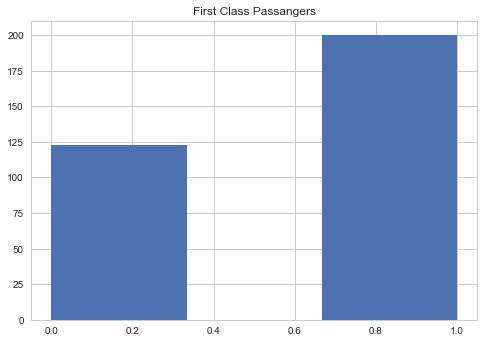

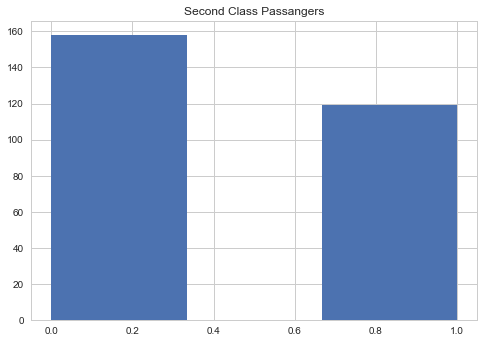

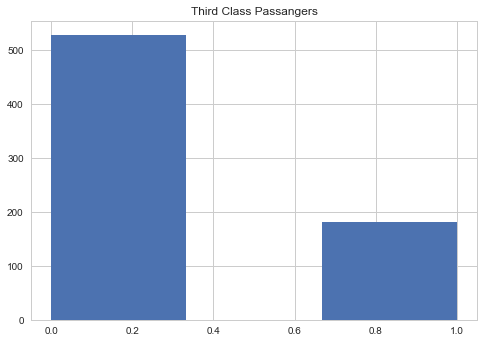

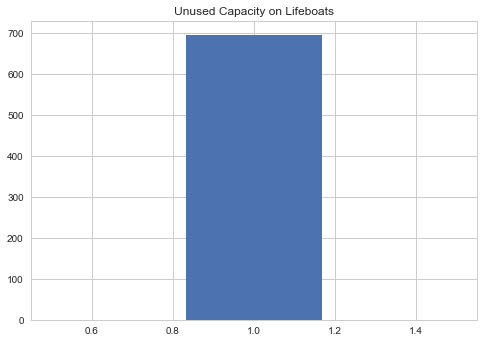

In [14]:
titanic_list_fm_group_p = titanic_list.groupby(['Passanger_Class'], as_index = True)
ax = titanic_list_fm_group_p.hist(bins=3)
ax[1][0][0].set_title('First Class Passangers')
ax[2][0][0].set_title('Second Class Passangers')
ax[3][0][0].set_title('Third Class Passangers')
ax['unused'][0][0].set_title('Unused Capacity on Lifeboats')


As seen in the first two histograms in this notebook, the first three plots of the above four show how being of a higher class greatly increases your chances of survival. The last plot shows that almost 700 more people could have survived if lifeboats were filled to capacity.

To answer my main question, I want to show the number of people in each lifeboat, what class they were and how many more people could have fit in each lifeboat. However, there are some people that survived but which lifeboat they got on is unknown. They will be reprecented in the first bar.

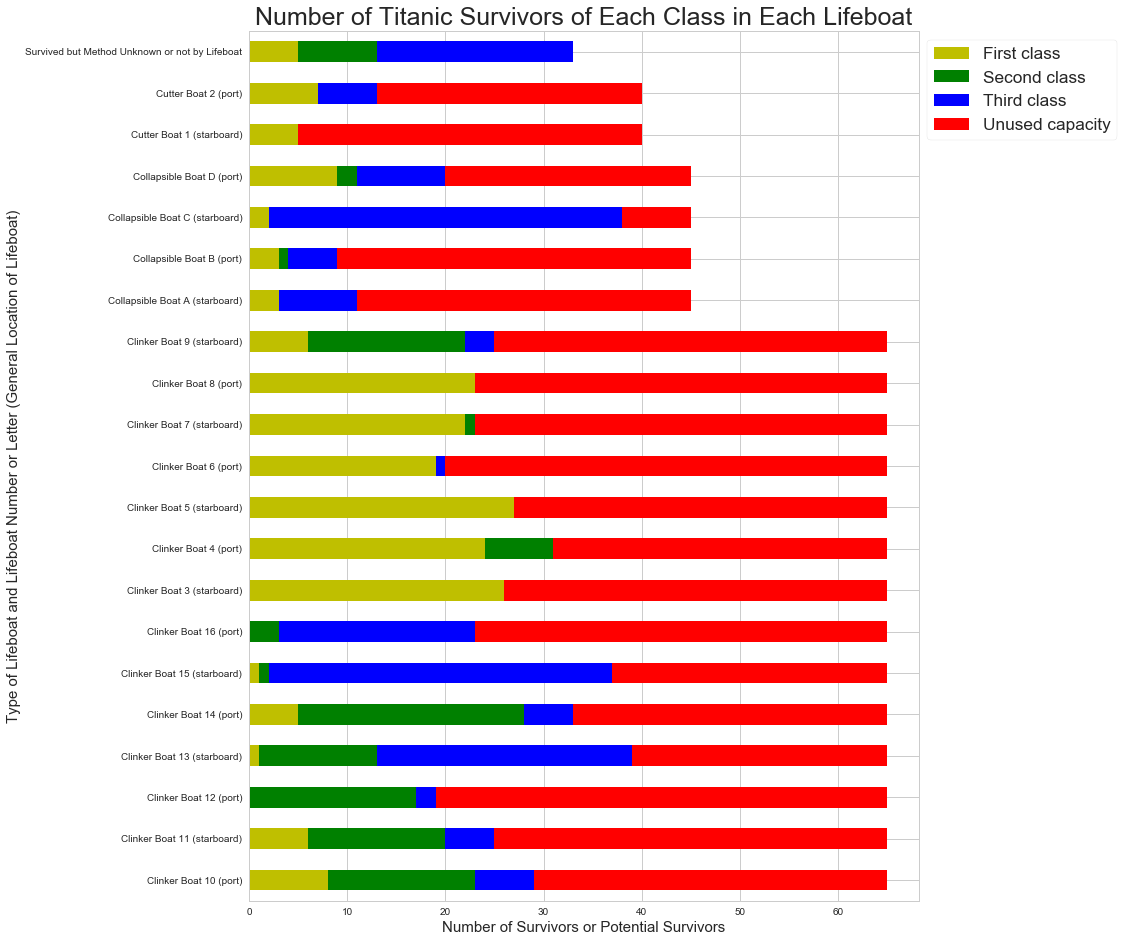

In [15]:
# Creates plot
titanic_list_fm_group_bp = titanic_list.groupby(['Lifeboat', 'Passanger_Class'], as_index = True) #have to group again 
                                                                                     #because of previous line.

titanic_list_boat_group_pclass_count = titanic_list_fm_group_bp.agg(['count'])['survived'] #counts up survivors from each boat.

mpl.rcParams['figure.figsize'] = [12.0, 16.0] #increase figure size for readability
fig, ax = subplots()

titanic_list_boat_group_pclass_count.unstack().plot(kind='barh', color=['y', 'g', 'b', 'r'], stacked=True, ax=ax)
ax.set_title('Number of Titanic Survivors of Each Class in Each Lifeboat',fontsize= 25)
ax.set_xlabel('Number of Survivors or Potential Survivors', fontsize= 15)
ax.xaxis.set_label_position('top' and 'bottom') 
ax.set_ylabel('Type of Lifeboat and Lifeboat Number or Letter (General Location of Lifeboat)', fontsize= 15)
ax.legend(['First class', 'Second class', 'Third class', 'Unused capacity'], 
          fontsize='x-large', frameon=1, loc='upper left', bbox_to_anchor=(1.0, 1.0));

This plot shows the huge waste of unused space. However, I decided that instead at looking at the number of passangers in each boat, looking at the percentage of space used in each boat would look better visually.

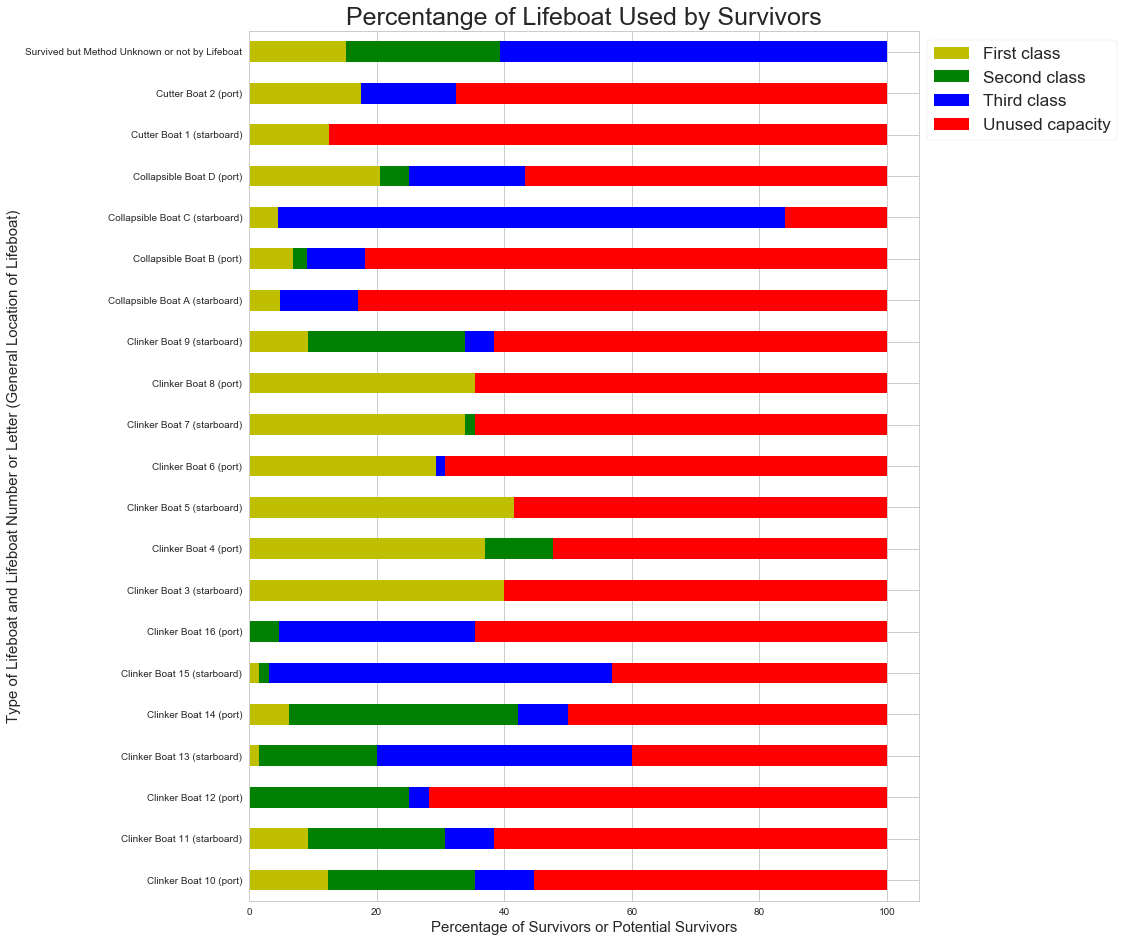

In [16]:
# Creates plot
mpl.rcParams['figure.figsize'] = [12.0, 16.0] #increase figure size for readability
fig, ax = subplots()
titanic_list_boat_group_pclass_sum = titanic_list_fm_group_bp.agg(['sum'])['survived']#counts up survivors from each boat.
titanic_list_boat_group_pclass_percent = titanic_list_boat_group_pclass_sum.groupby(level=0).apply(lambda x:
                                                                                                   100 * x / float(x.sum()))

titanic_list_boat_group_pclass_percent.unstack().plot(kind='barh', color=['y', 'g', 'b', 'r'], stacked=True, ax=ax)
ax.set_title('Percentange of Lifeboat Used by Survivors',fontsize= 25)
ax.set_xlabel('Percentage of Survivors or Potential Survivors', fontsize= 15)
ax.xaxis.set_label_position('top' and 'bottom') 
ax.set_ylabel('Type of Lifeboat and Lifeboat Number or Letter (General Location of Lifeboat)', fontsize= 15)
ax.legend(['First class', 'Second class', 'Third class', 'Unused capacity'], 
          fontsize='x-large', frameon=1, loc='upper left', bbox_to_anchor=(1.0, 1.0));

This plot gives a better overall sense of the wasted unused space, as well as the proportion of each class to the other.

<a id='conclusions'></a>
## Conclusions

If you take the data at face value, most of the lifeboats were used at less than 50% capacity. Even if you take into account the people that survived but have no data as to how. However, the dataset has some limitations. Looking at random samples from the dataset, I compared the ages of some of the passenger from the original file to data available at encyclopedia-titanica.org. While most matched, some did not. Some of the ages were not at the time of the sinking, but instead of when they died (of old age, disease, accident, etc.) after the sinking. While other survivors' ages were of the time of the sinking, even though they died years later of unrelated issues. This calls into question the entirety of the dataset. Another limitation is that there were a little over eight-hundred crew members on the titanic (Mersey, Lord (1999) [1912]). The Loss of the Titanic, 1912. The Stationery Office). But their data was not included in this dataset. Including their data could affect the results of the plots. 

I belive that having the above horizontal bar plot overlap a map of the titanic, with each bar being located where the corrisponding lifeboat would be on the map, could be very interesting. I would guess that each class prefered certain lifeboats because of where the lifeboats were located on the ship.

In conclusion, I am confident in saying that most of the lifeboats were used at less than 50% capacity. However anything more exact would be beyond the dataset. This is an event that occured over 100 years ago, so it is not unexpected that there are many problems with the dataset. However, there are still many interesting things we can do with the data available. 

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0